[nltk_data] Downloading package punkt to C:\Users\lenovo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


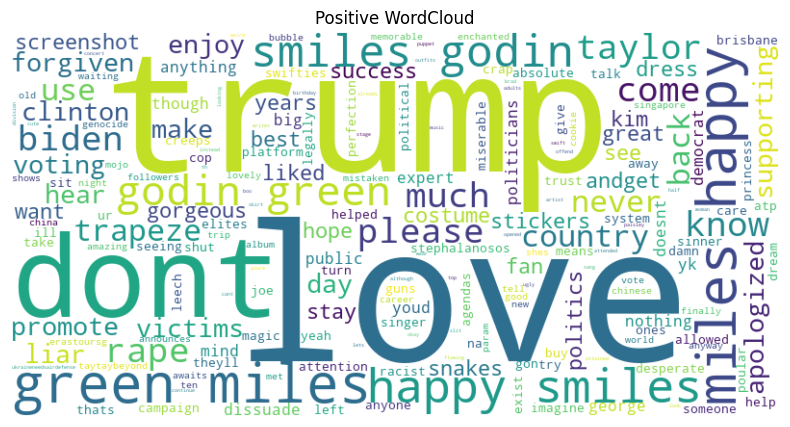

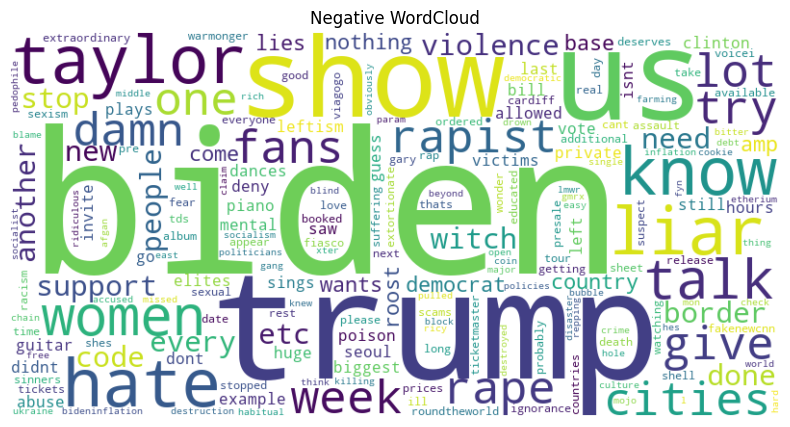

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('x.csv', encoding='latin1')  
# data cleaning
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'@\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    return text.lower()

# Segmentation and removal of stop words
def clean_and_tokenize(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]  # 去除停用词
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(clean_text).apply(clean_and_tokenize)

# Sentiment analysis: the use of VADER
sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classification of emotions: positive, negative
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

positive_text = df[df['sentiment_label'] == 'positive']['cleaned_text']
negative_text = df[df['sentiment_label'] == 'negative']['cleaned_text']

# Combine all positive and negative text to generate word clouds
positive_words = ' '.join(positive_text)
negative_words = ' '.join(negative_text)

# create word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(positive_words, 'Positive WordCloud')
generate_wordcloud(negative_words, 'Negative WordCloud')
